In [2]:
# du doan kha nang song sot tren con tau
import pandas as pd
import numpy as np
train_df = pd.read_csv('https://raw.githubusercontent.com/hieuu09/Data_Machinelearning/main/Titanic_train.csv', sep =',')
test_df = pd.read_csv('https://raw.githubusercontent.com/hieuu09/Data_Machinelearning/main/Titanic_test.csv', sep =',')

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#survi song hay die
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df .set_index(train_df.PassengerId, inplace=True)

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.drop('PassengerId', axis=1, inplace=True)

In [10]:
train_df
test_df= pd.read_csv('https://raw.githubusercontent.com/hieuu09/Data_Machinelearning/main/Titanic_test.csv', sep=',', index_col="PassengerId")
test_df.tail()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [13]:
# categorical phan loai
train_df["Survived"] = train_df["Survived"].astype("category")

In [14]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [15]:
# viet funtion cho tung ham  1
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
# chuyen doi cac cot nay sang kieu du lieu categorical
def convert_cat(df, features):
  for feature in features:
    df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [17]:
# phan bo cac feature nay
train_df.describe(  )

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [18]:
# chuyen doi category vi khi descibe phan loai numerical ko dung

In [19]:
train_df.describe(include=['category'])
# 549 nguoi mat tren tong 891 nguoi

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [20]:
# khai pha
train_df["Survived"].value_counts().to_frame() # 0 la nhung nguoi die, 1 song sot co 549 hanh khac die

,Survived
0,549
1,342


In [21]:
# xasc dinh % khach hang son va di
train_df["Survived"].value_counts(normalize=True).to_frame()
# 0 so % hanh khach die

,Survived
0,0.616162
1,0.383838


In [22]:
# khai pha
train_df["Sex"].value_counts().to_frame() # 0 la nhung nguoi die, 1 song sot co 549 hanh khac die

,Sex
male,577
female,314


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sex', ylabel='count'>

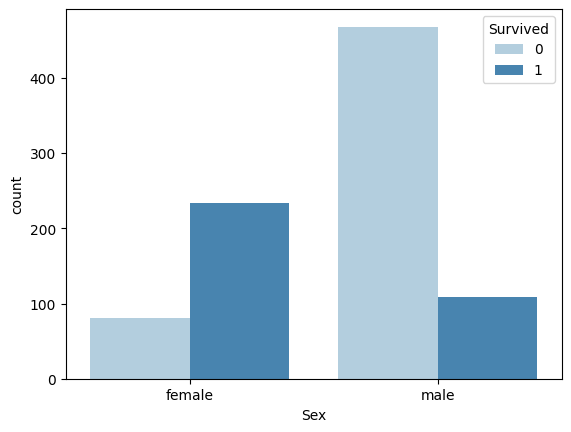

In [24]:
sns.countplot(data=train_df, x='Sex', palette='Blues', hue='Survived')# 0 song 1 chet
# nu o kha nang song sot cao hon vaoi nam gioi

In [25]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

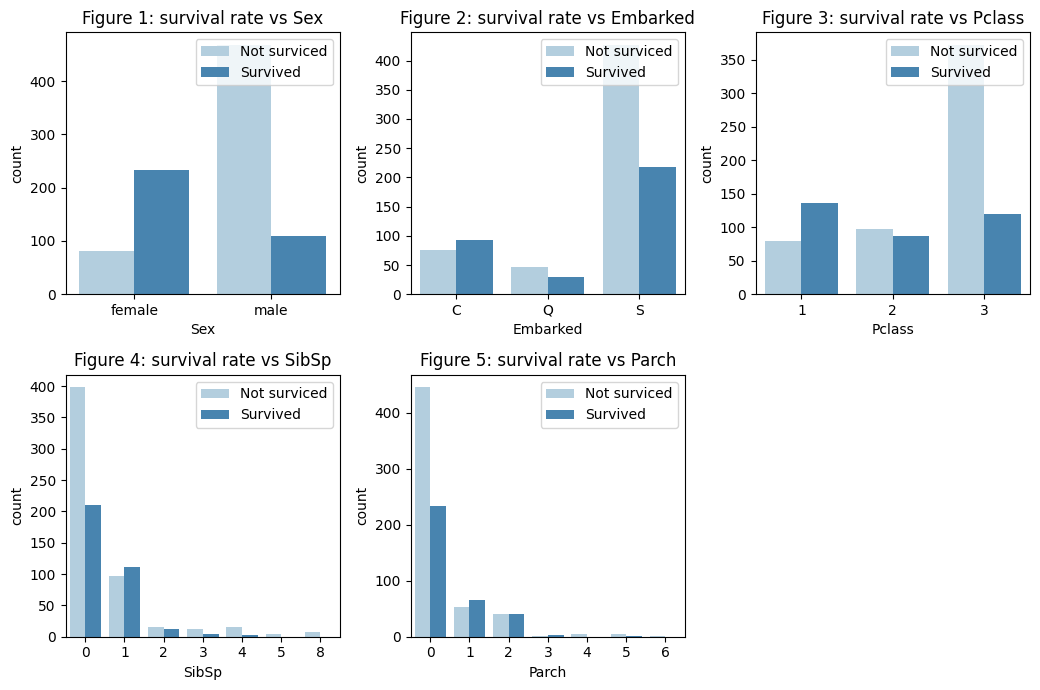

In [26]:
n_rows = 2
n_cols = 3
fix, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))
for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols+c # = 0 dau tien i chinh la index
    if i < len(cols):
      ax_i = ax[r, c]
      sns.countplot(data= train_df, x=cols[i], hue='Survived', palette='Blues', ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: survival rate vs {cols[i]}")
      ax_i.legend(title = '', loc ='upper right', labels=['Not surviced', 'Survived'])
ax.flat[-1].set_visible(False) # cho hinh cuoi cung ko hien ra
plt.tight_layout() # tachkhaong cah giua xcac inh
plt.show()

# embarked nnoi passenger len tau
#pclass ang thuong gia voi
#sibsp so anh chi em di chung
#parchti le nguoi di voi cha me 0 1 2 nguoi


In [28]:
# phan bo ve tuoi va f

<Axes: xlabel='Age', ylabel='Count'>

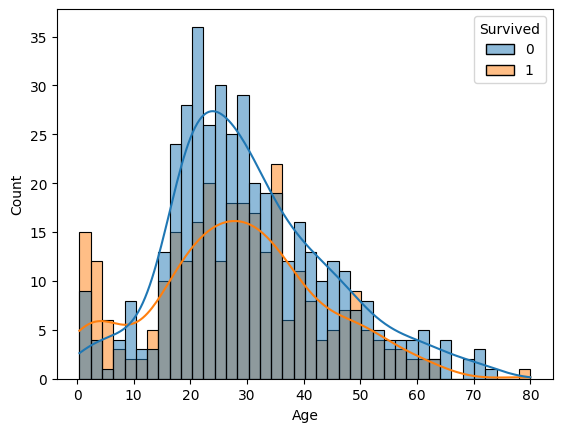

In [27]:
sns.histplot(data= train_df, x='Age', hue='Survived', bins=40, kde= True)
# bins chia do tuoi bao nhieu khoang
# kde co cho dg caong len khong
# truc tung hanh khach
# cot mau cam song sot
# cot mau xanh die
# bieu thi pha  bo tuoi tren chuyen tau titanic

In [29]:
train_df["Fare"].describe()
# 25 % nam 7.9 do
# cao nhat 512 do

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

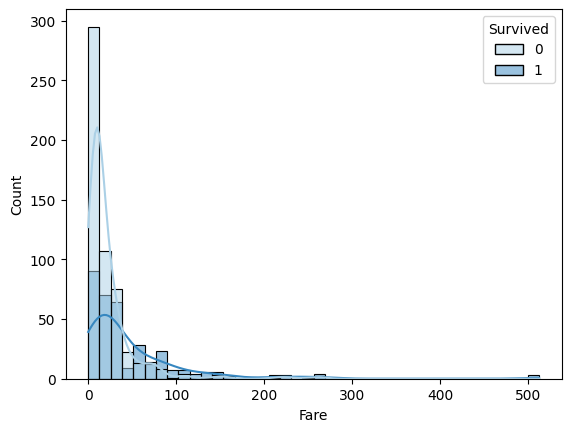

In [30]:
sns.histplot(data= train_df, x='Fare', bins=40, hue='Survived', palette='Blues', kde=True)


<Axes: xlabel='Fare', ylabel='count'>

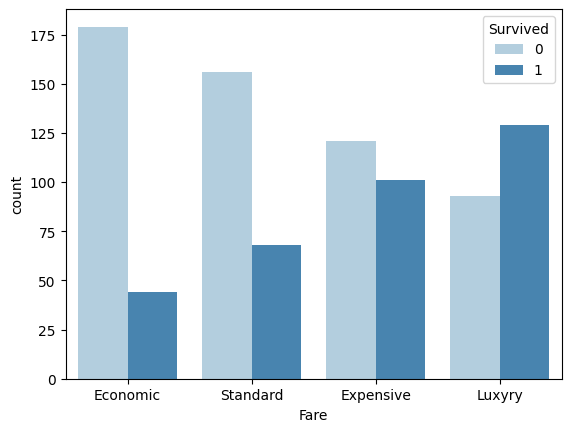

In [31]:
# phan chia 25, 75, 50 %
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxyry']
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)
sns.countplot(x=quartile_data, hue=train_df['Survived'], palette='Blues')

In [32]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

In [33]:
train_df["Name"] # phan bo nguoi song sot va khong song
# tach ra khoi cai tendef extr

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [44]:
import re
def extract_title(name):
  p= re.compile(r",([\w\s]+)\.")
  return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name:extract_title(name))

In [45]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [46]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [47]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

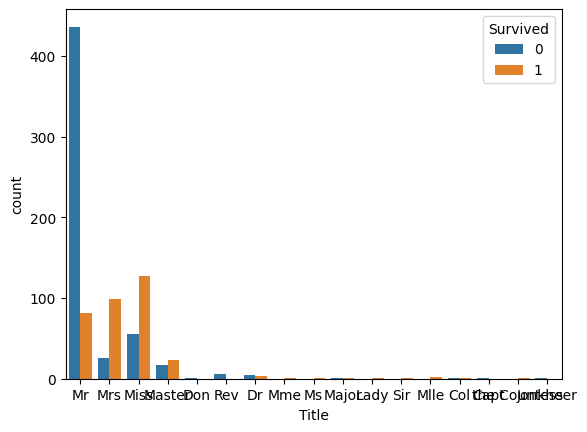

In [49]:
sns.countplot(data=train_df, x='Title', hue='Survived')

In [60]:
# gop cac nhom lai thanh 1 nhom duy nhat
def group_title(title):
  if title in  ['Mr', 'Mrs', 'Miss', 'Master']:
   return title
  elif title =="Ms":
    return "Miss"
  else:
    return "Others"
    # cach 2 khong viet am
#train_df['Title'].apply(lambda title: title if title in ['Mr', 'Mrs', 'Miss', 'Master'] else "Others" )

train_df['Title']=train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))


<Axes: xlabel='Title', ylabel='count'>

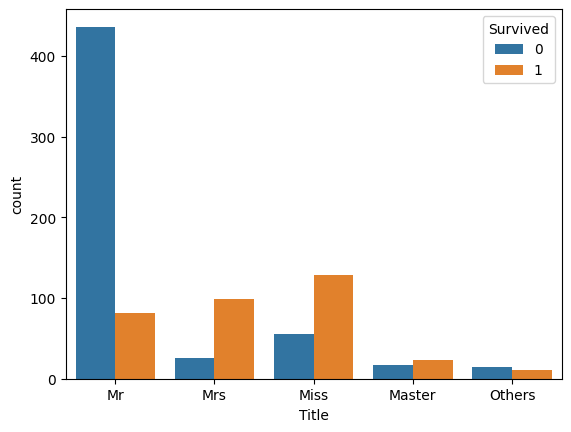

In [62]:
sns.countplot(data= train_df, x='Title', hue='Survived')

In [ ]:
# so luong anh chi em con cai di chung voi nhau

In [64]:
# so luong gia dinh di dong hay it
#categori ve int de cong
train_df['Family_Size'] = train_df['SibSp']. astype('int')+ train_df['Parch'].astype('int')+1
# tap test
test_df['Family_Size'] = test_df['SibSp']. astype('int')+ test_df['Parch'].astype('int')+1



<Axes: xlabel='Family_Size', ylabel='count'>

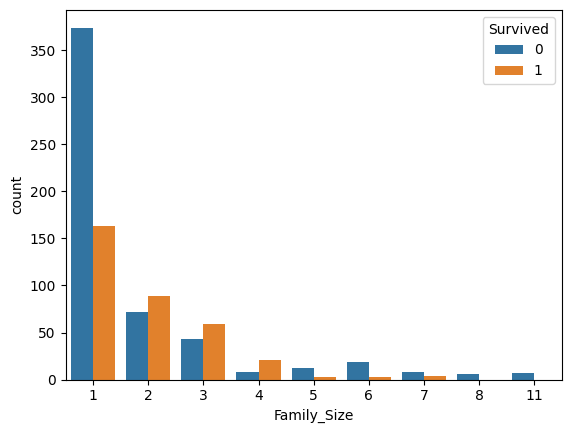

In [65]:
sns.countplot(data=train_df, x='Family_Size', hue='Survived') # ti le nguoi di cang dong cang de thoait die


In [83]:
train_df['Family_Cat']=pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20,], labels=['Solo', 'Small', 'Medium', 'Large'])
test_df['Family_Cat']=pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20,], labels=['Solo', 'Small', 'Medium', 'Large'])



<Axes: xlabel='Family_Cat', ylabel='count'>

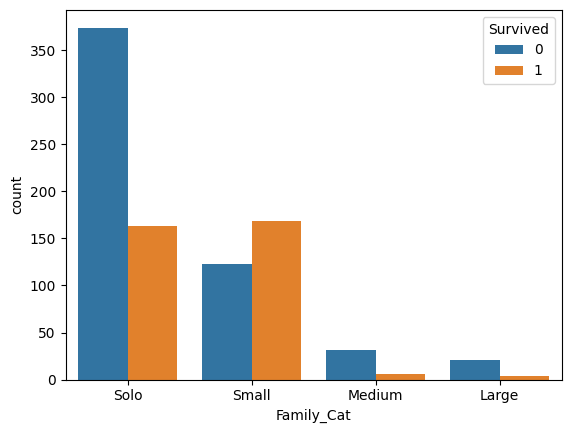

In [82]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived') # gom nhom


In [ ]:
# chuyen du lieu tho thanh cac due lieu dua vao phan tich

In [75]:
num_features =['Age', 'Fare'] # tuoi va phi
cat_features =['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols=num_features+cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [85]:
def display_missing(df, feature_cols):
  n_rows = df.shape[0]
  for col in feature_cols:
    missing_count= df[col].isnull().sum()
    if missing_count>0:
      print(f"{col} has {missing_count*100/ n_rows:.2f}% missing values.")
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)


Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


In [88]:
# filling missing values with median of whole dataset
# tim age co tuong dong voi cac cot nao trong dataframe
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']
age_by_sex_pclass
# gioi tinh nu do tuoi trung bung 25

<ipython-input-88-d7b6d1ac0aa4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [95]:
train_df['Age']=train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

test_df['Age']=test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

<ipython-input-95-254c62bbe9cf>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age']=train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
<ipython-input-95-254c62bbe9cf>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test_df['Age']=test_df.groupby(['Sex'

In [97]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has 0.22% missing values.
Fare has 0.24% missing values.


In [132]:
X= train_df[feature_cols]
y = train_df['Survived']
X_test= test_df[feature_cols]

In [133]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
     ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [134]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [135]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [164]:
#X= preprocessor.transform(X)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Buoi cuoi

In [ ]:
# su dung du lieu lan truoc xay dung mohinh may hoc

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [167]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [170]:
X_test.shape

(179, 19)

In [189]:
# xay dung mo hinh may hoc chuyen ve classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [147]:
log_reg.score(X_val, y_val)

0.8324022346368715

In [149]:
y_pred= log_reg.predict(X_val)

In [150]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred) # du doanh y

(0.7704918032786885, 0.746031746031746)

In [154]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       116
           1       0.77      0.75      0.76        63

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [171]:
#y = ax1+bx2+bias > y =ax1^2+bx^2+ c

In [186]:
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [187]:
poly_log_reg =LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [188]:
poly_log_reg.score(poly_features_X_val, y_val) # thap hon 0.83ko tap tot hon

0.8379888268156425

In [193]:
# mohinh 2
#decision tree
decision_tree =DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [194]:
decision_tree.score(X_val, y_val)
# 0.81  nho hon bang cai phia tren

0.8212290502793296

**5.1 CROSS VALIDATION **

In [195]:
# tao cai basel line model
#cross valiation
from sklearn.model_selection import cross_val_score

In [200]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion ='entropy', max_depth=8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv=5)

In [202]:
lr_scores.mean(), lr_scores.std()


(0.826031008725127, 0.020466357172416235)

In [ ]:
# ko phai tap valiation cung tot nen phai chia ra nhieu lan

In [203]:
dt_scores = cross_val_score(dt_cv, X, y, scoring='accuracy', cv=5)

In [204]:
dt_scores.mean(), dt_scores.std()

(0.8069801016885318, 0.014586754299604428)

5.2 Baseline Model Comparison

In [226]:
#kneighbors_graph
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed =2023
models =[
    LinearSVC(random_state=12000),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver ='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(user_label_encoder=False, eval_metric='logloss', random_state=seed)
]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[16:57:00] WARNING: ../src/learner.cc:767: 
Parameters: { "user_label_encoder" } are not used.

[16:57:00] WARNING: ../src/learner.cc:767: 
Parameters: { "user_label_encoder" } are not used.

[16:57:01] WARNING: ../src/learner.cc:767: 
Parameters: { "user_label_encoder" } are not used.

[16:57:02] WARNING: ../src/learner.cc:767: 
Parameters: { "user_label_encoder" } are not used.

[16:57:02] WARNING: ../src/learner.cc:767: 
Parameters: { "user_label_encoder" } are not used.



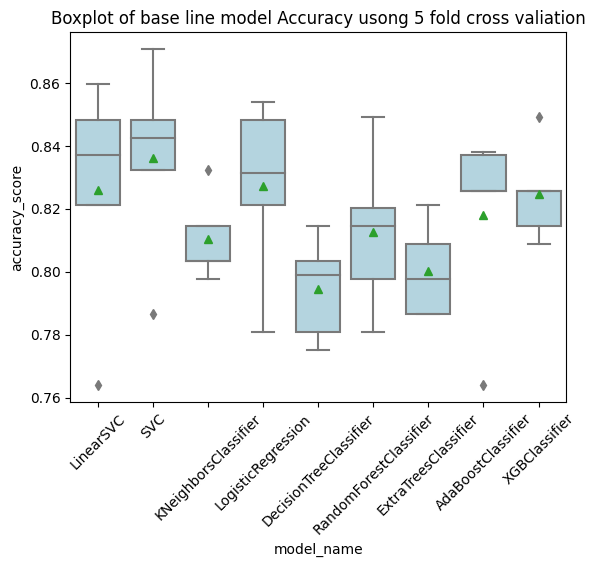

,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
XGBClassifier,0.824889,0.015407
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.800201,0.014999
DecisionTreeClassifier,0.794608,0.016252


In [249]:
def generate_baseline_results(models , X, y, metrics, cv=5, plot_results=False):
  kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
  entries =[]
  for model in models:
    model_name= model.__class__.__name__
    scores= cross_val_score(model, X, y, scoring=metrics, cv=kfold)
    for fold_idx, score in enumerate(scores):
      entries.append((model_name, fold_idx, score))
  cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

  if plot_results:
    sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
    plt.title('Boxplot of base line model Accuracy usong 5 fold cross valiation')
    plt.xticks(rotation=45)
    plt.show()

# summaru result
  mean = cv_df.groupby('model_name')['accuracy_score'].mean()
  std = cv_df.groupby('model_name')['accuracy_score'].std()


  baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
  baseline_results.columns=['Mean', 'Standard Deviation']
  # sort by acuracy
  baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)

  return baseline_results

generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=True)